In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
from os.path import split
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [3]:
data_dir='/content/drive/MyDrive/PlantDisease/Data'
categories=os.listdir(data_dir)

#Load image and Labels
images=[]
labels=[]

for category in categories:
  print(category)
  folder_path=os.path.join(data_dir,category)
  for img_file in os.listdir(folder_path):
    img_path=os.path.join(folder_path,img_file)
    img=cv2.imread(img_path)
    if img is not None:
      img=cv2.resize(img,(64,64))
      images.append(img)
      labels.append(category)

#Convert images ans labels to numpy arrays
images=np.array(images)


Tomato___Late_blight
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus
Tomato___Target_Spot
Tomato___healthy
Tomato___Early_blight
Tomato___Bacterial_spot


In [15]:
#conver to numpy arrays
x=np.array(images)
y=np.array(labels)

print("Labels:",np.unique(y))
print("Data Shape:",x.shape)


Labels: ['Tomato___Bacterial_spot' 'Tomato___Early_blight' 'Tomato___Late_blight'
 'Tomato___Target_Spot' 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
 'Tomato___Tomato_mosaic_virus' 'Tomato___healthy']
Data Shape: (12996, 64, 64, 3)


Class Distribution:
Tomato___Tomato_Yellow_Leaf_Curl_Virus    1980
Tomato___healthy                          1926
Tomato___Early_blight                     1920
Tomato___Late_blight                      1851
Tomato___Target_Spot                      1827
Tomato___Tomato_mosaic_virus              1790
Tomato___Bacterial_spot                   1702
Name: count, dtype: int64


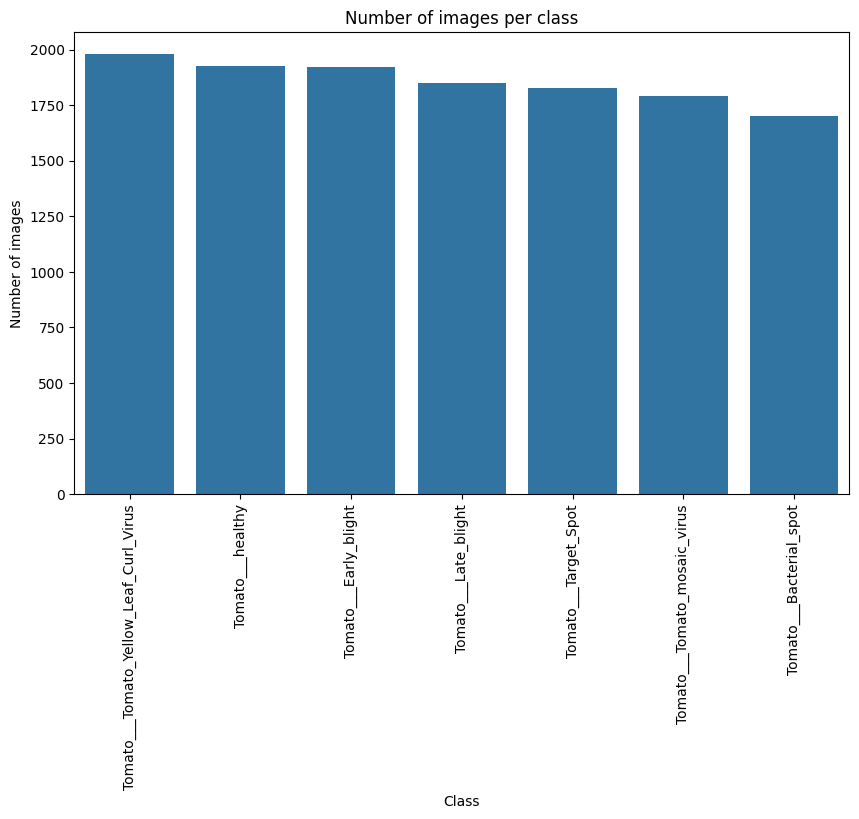

In [5]:
class_counts=pd.Series(y).value_counts()
print("Class Distribution:")
print(class_counts)

#plot class distrubution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index,y=class_counts.values)
plt.xticks(rotation=90)
plt.title("Number of images per class")
plt.xlabel("Class")
plt.ylabel("Number of images")
plt.show()

In [6]:
#removed corrupted images()
valid_images=[]
valid_labels=[]

for img,label in zip(x,y):
  if img.shape==(64,64,3):
    valid_images.append(img)
    valid_labels.append(label)

x=np.array(valid_images)
y=np.array(valid_labels)


print("Cleaned Data Shape:",x.shape)

Cleaned Data Shape: (12996, 64, 64, 3)


In [7]:
#Encode labels
le=LabelEncoder()
y_encoded=le.fit_transform(y)

#save class names for later use
class_names=le.classes_
class_names

array(['Tomato___Bacterial_spot', 'Tomato___Early_blight',
       'Tomato___Late_blight', 'Tomato___Target_Spot',
       'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'], dtype='<U38')

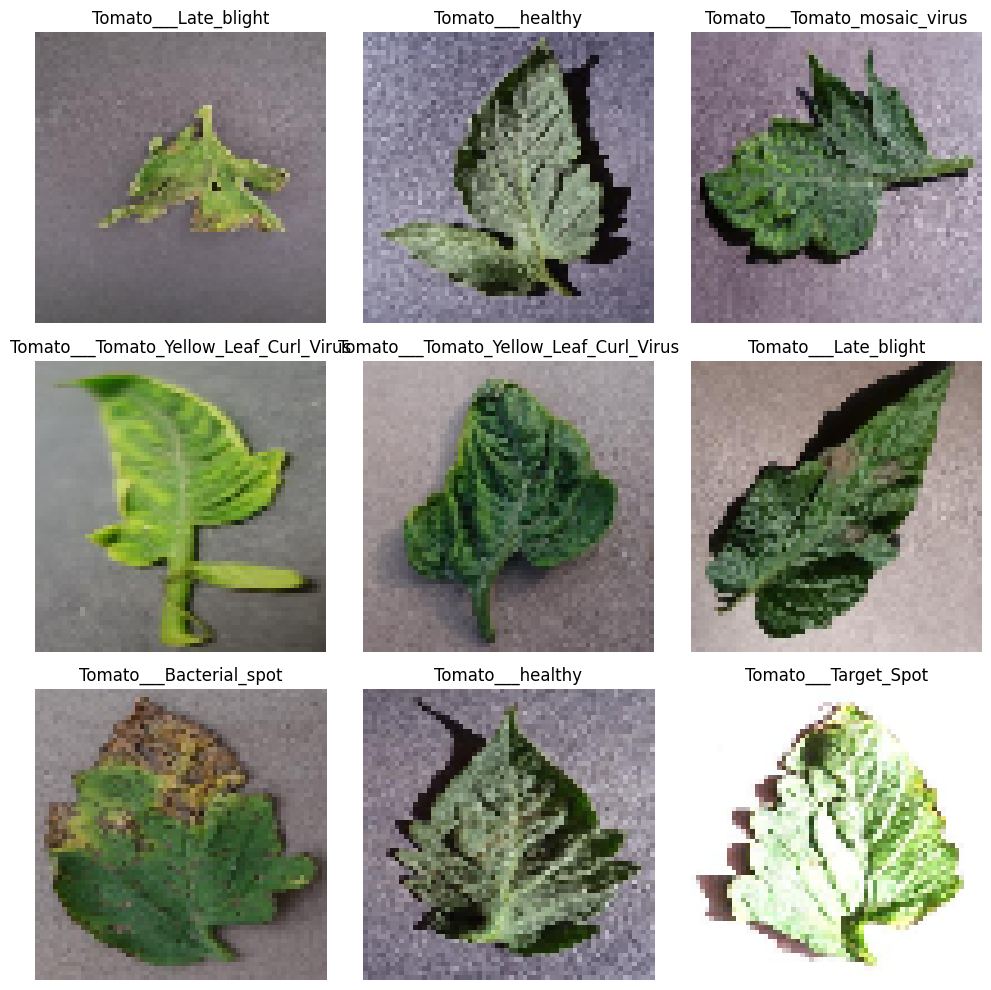

In [8]:
import random

plt.figure(figsize=(10,10))
for i in range(9):
  idx=random.randint(0,len(x))
  plt.subplot(3,3,i+1)
  plt.imshow(cv2.cvtColor(x[idx],cv2.COLOR_BGR2RGB))
  plt.title(class_names[y_encoded[idx]])
  plt.axis('off')
plt.tight_layout()
plt.show()



In [9]:
def extract_color_histogram(image,bins=(8,8,8)):

  image=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
  hist=cv2.calcHist([image],[0,1,2],None,bins,[0,256,0,256,0,256])
  hist=cv2.normalize(hist,hist).flatten()
  return hist

hist_features=[extract_color_histogram(img) for img in x]
x_features=np.array(hist_features)



In [10]:
x_features.shape

(12996, 512)

In [11]:
#Choosw model
model=SVC(kernel='rbf',C=10,gamma='scale')

In [12]:
#Train/Test Split
X_train,X_test,y_train,y_test=train_test_split(x_features,y_encoded,test_size=0.2,random_state=42)

#train model
model.fit(X_train,y_train)

#predict
y_pred=model.predict(X_test)

accurancy: 0.9723076923076923
F1 Score: 0.972285121974925


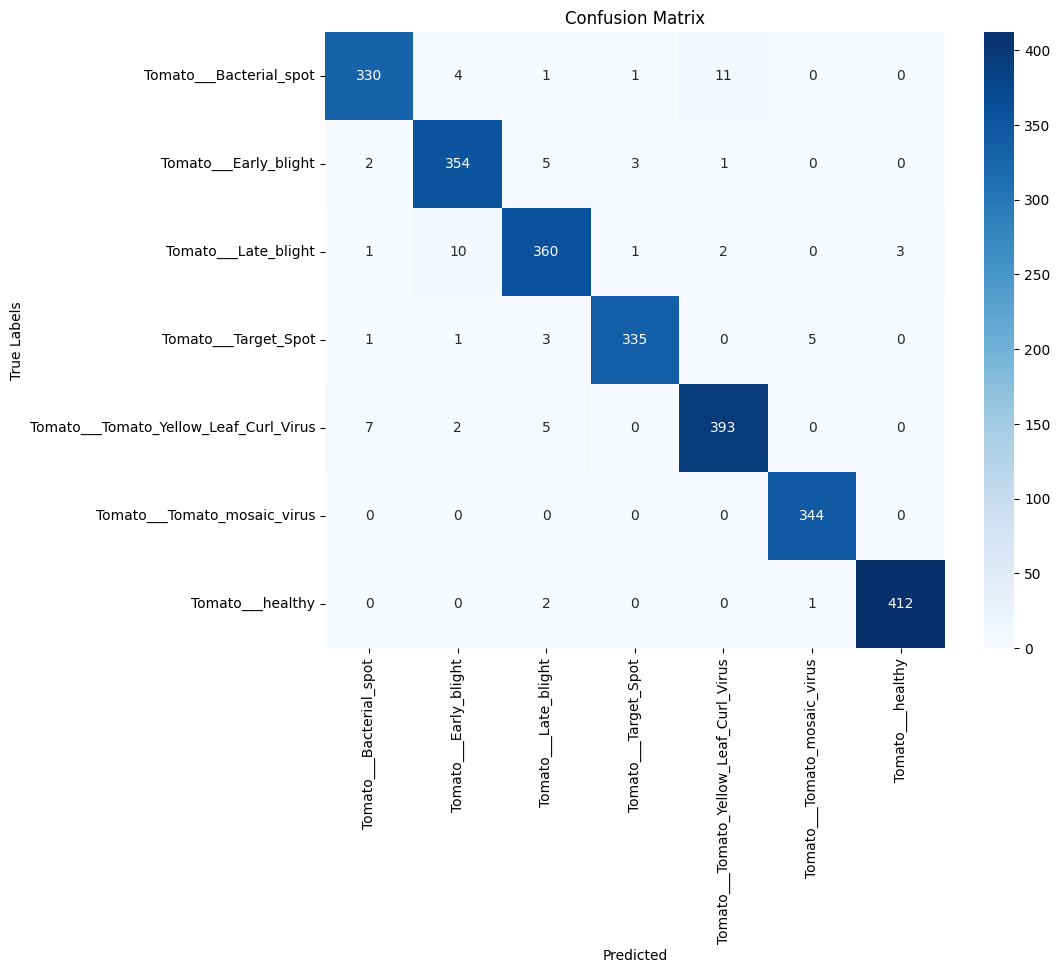

In [13]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

#Accurancy
acc=accuracy_score(y_test,y_pred)
print("accurancy:",acc)

#F1 Score
f1=f1_score(y_test,y_pred,average='weighted')
print("F1 Score:",f1)

#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)

#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [14]:
#Classification Report
print("Classification Report:")
print(classification_report(y_test,y_pred,target_names=class_names))


Classification Report:
                                        precision    recall  f1-score   support

               Tomato___Bacterial_spot       0.97      0.95      0.96       347
                 Tomato___Early_blight       0.95      0.97      0.96       365
                  Tomato___Late_blight       0.96      0.95      0.96       377
                  Tomato___Target_Spot       0.99      0.97      0.98       345
Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.97      0.97      0.97       407
          Tomato___Tomato_mosaic_virus       0.98      1.00      0.99       344
                      Tomato___healthy       0.99      0.99      0.99       415

                              accuracy                           0.97      2600
                             macro avg       0.97      0.97      0.97      2600
                          weighted avg       0.97      0.97      0.97      2600

